In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs.utils import *
from scipy import special

In [2]:
N = 10000
params = [[0.9, 0.5],  [1.3, 0.3], [1.5, 0.0]] #(g, \sigma_n)
sigma_s_tilde = 1.

In [3]:
# simulation
mcs = np.load("data/mcscaling_erf.npy")
trial = np.shape(mcs)[1]
max_leadout = np.shape(mcs)[2]

In [4]:
# theory
mc_theory_list = []
threshold_list = []
K_list = []
r_list = []
non_diverged_mc_list = []
non_diverged_r_list = []
alpha = np.arange(0.0, 1.01, 0.01)

for [g, sigma_n] in params:
    K = 0.1
    for _ in range(1000):
        K = sigma_n**2 + sigma_s_tilde**2/np.sqrt(N) + g**2 * (-1 + (4/np.pi)*np.arctan(np.sqrt(1+np.pi*K))) 
    K_list.append(K)
    
    A = alpha*(sigma_s_tilde**2)/K
    B = g**2 / (1+0.5*np.pi*K)
    
    mc_theory = np.zeros(len(alpha))
    for m in range(1,100):
        mc_theory += (-1)**(m-1) * (A**m) / (1-B**m)
        
    mc_theory_list.append(mc_theory)
    
    threshold = (K/np.sqrt((K-sigma_n**2)**2+sigma_s_tilde**4)) * np.sqrt(1-B**2)
    threshold_list.append(threshold)
    
    denominator = alpha*(sigma_s_tilde**2/K)/(1-B)
    r = mc_theory/(denominator+ 1e-7)
    r_list.append(r[1:])
    non_diverged_r = np.append(np.where(r[1:-1]-r[2:]>0, 1, np.nan),np.nan)*r[1:]
    non_diverged_r_list.append(non_diverged_r)
    non_diverged_mc = np.append(np.where(r[1:-1]-r[2:]>0, 1, np.nan),[np.nan,np.nan])*mc_theory
    non_diverged_mc_list.append(non_diverged_mc)
    

## Memory capacity

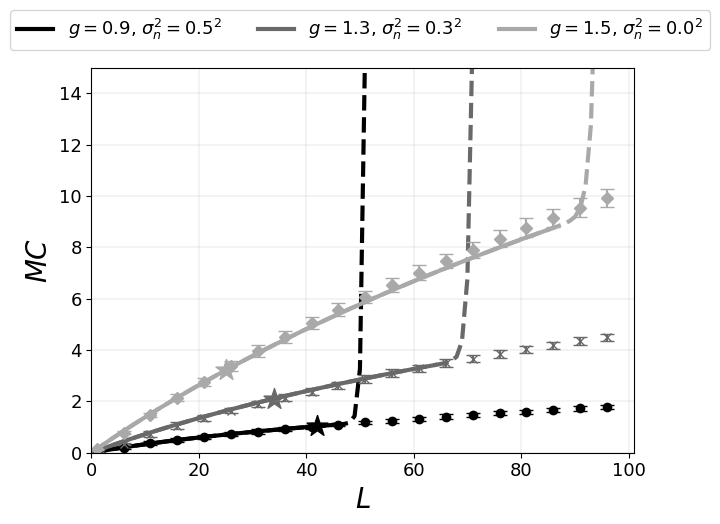

In [5]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "D"]
colors = ["black", "dimgray", "darkgray"]
i=0
for [g, sigma_n] ,mc_theory, threshold, non_diverged_mc in zip(params, mc_theory_list, threshold_list, non_diverged_mc_list):
    mc_mean = np.mean(mcs[i], axis=0)
    mc_std = np.std(mcs[i], axis=0)
    plt.errorbar(np.arange(1,max_leadout+1,5), mc_mean[::5], mc_std[::5], marker=markers[i], color=colors[i],markersize=6,linestyle="", capsize=5)
    
    threshold_L = int(threshold*np.sqrt(N))
    plt.plot(alpha*np.sqrt(N), mc_theory, color=colors[i], linewidth=3, linestyle="--")
    plt.plot(alpha*np.sqrt(N), non_diverged_mc, color=colors[i], linewidth=3, \
        label=r"$g=$"+f"{g}, " + r"$\sigma_n^2=$"+f"{sigma_n}"+r"$^2$")
    plt.scatter(threshold_L, mc_theory[threshold_L], marker="*", color=colors[i], s=250)
    i += 1
plt.xlabel(r"$L$",fontsize=20)
plt.ylabel(r"$MC$",fontsize=20)
plt.tick_params(labelsize=13)
plt.xlim(0,max_leadout+1)
plt.ylim(0,15)
plt.legend(ncol=3,fontsize=13, bbox_to_anchor=(-0.15, 1.15), loc='upper left', borderaxespad=0,)
plt.grid(linewidth=0.2)
plt.show()

## Decay rate

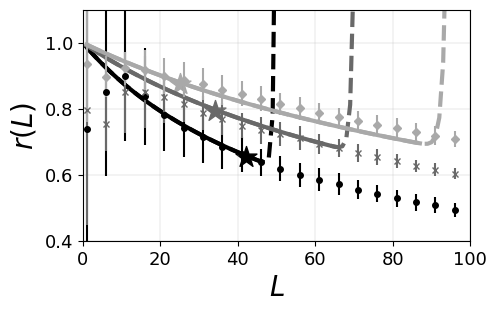

In [6]:
plt.figure(figsize=(5,3))
i=0
for [g, sigma_n] ,mc_theory, threshold, K, r, non_diverged_r in zip(params, mc_theory_list, threshold_list, K_list, r_list, non_diverged_r_list):
    """theory
    """
    plt.plot(alpha[1:]*np.sqrt(N), r, color=colors[i], linewidth=3, linestyle="--")
    plt.plot(alpha[1:]*np.sqrt(N), non_diverged_r, color=colors[i], linewidth=3,\
        label=r"$g=$"+f"{g}, " + r"$\sigma_n^2=$"+f"{sigma_n}"+r"$^2$")
    
    threshold_L = int(threshold*np.sqrt(N))
    plt.scatter(threshold_L, r[threshold_L], marker="*", color=colors[i], s=250)
    
    """simulation
    """
    mc_mean = np.mean(mcs[i], axis=0)
    mc_std = np.std(mcs[i], axis=0)
    B = g**2 / (1+0.5*np.pi*K)
    plt.errorbar(np.arange(1, max_leadout+1, 5), np.sqrt(N)*mc_mean[0::5]/(((sigma_s_tilde**2/K)/(1-B))*np.arange(1,max_leadout+1,5)), \
        np.sqrt(N)*mc_std[0::5]/(((sigma_s_tilde**2/K)/(1-B))*np.arange(1,max_leadout+1,5)), color=colors[i], marker=markers[i], linestyle="", markersize=4)
    
    i += 1
    
plt.xlabel(r"$L$",fontsize=20)
plt.ylabel(r"$r(L)$",fontsize=20)
plt.tick_params(labelsize=13)
plt.xlim(0,100)
plt.ylim(0.4,1.1)    
#plt.legend(fontsize=14)
plt.grid(linewidth=0.2)
plt.show()